In [732]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time # to measure how long the models take
from sklearn import datasets
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
import random

In [733]:
df = pd.read_csv('/Users/tauny/Desktop/Schulich - School/Classes/Fall 2024 - Semester 2/Predictive Modelling/Exams/Final/data_set_hackathon.csv')

In [734]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


In [735]:
df.describe()

,Customer Order Code,value
count,2.420000e+03,2420.000000
mean,3.200672e+09,1162.976624
std,1.004408e+05,2560.595118
min,3.200435e+09,-0.030000
25%,3.200614e+09,33.030000
50%,3.200711e+09,70.490000
75%,3.200729e+09,1363.200000
max,3.201062e+09,38937.500000


Check for nulls and type.

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


Data is good.

TIME - SERIES AGGREGATION

In [737]:
# Convert "order_date" to datetime with dayfirst=True
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)

# Convert "Requested Delivery Date" to datetime with dayfirst=True
df["requested_delivery_date"] = pd.to_datetime(df["requested_delivery_date"], dayfirst=True)

# Preview the updated DataFrame
print(df.head())

  order_date requested_delivery_date Customer Country Code Product Code  \
0 2009-07-13              2010-01-28                    RU    L10705000   
1 2009-07-15              2010-03-24                    RU    L10705000   
2 2009-07-16              2010-02-04                    RU    L10705000   
3 2009-07-17              2010-02-04                    RU    L10705000   
4 2009-07-21              2010-02-01                    RU    L10705000   

                   Description order_type  Customer Order Code     value Curr  \
0  Parka Outdoor Lifestyle STD         VO           3200435553   2337.00  RUB   
1  Parka Outdoor Lifestyle STD         VO           3200435694  10160.25  RUB   
2  Parka Outdoor Lifestyle STD         VO           3200435741   2992.50  RUB   
3  Parka Outdoor Lifestyle STD         VO           3200435907   4061.25  RUB   
4  Parka Outdoor Lifestyle STD         VO           3200435963   2208.75  RUB   

  items   Route  
0     6  RU0001  
1    23  RU0001  
2     7 

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   object        
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 208.1+ KB


In [739]:
# Extract Year, Month, and Day from 'order_date'
df["Order_Year"] = df["order_date"].dt.year
df["Order_Month"] = df["order_date"].dt.month

# Extract Year, Month, and Day from 'requested_delivery_date'
df["Requested_Delivery_Year"] = df["requested_delivery_date"].dt.year
df["Requested_Delivery_Month"] = df["requested_delivery_date"].dt.month

In [740]:
df.head(10)

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Order_Year,Order_Month,Requested_Delivery_Year,Requested_Delivery_Month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,2009,7,2010,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,2009,7,2010,3
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2009,7,2010,2
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2009,7,2010,2
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2009,7,2010,2
5,2009-07-20,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435982,2173.12,RUB,5,RU0001,2009,7,2010,2
6,2009-07-20,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200436075,3344.00,RUB,8,RU0001,2009,7,2010,1
7,2009-07-20,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200436082,3158.75,RUB,7,RU0001,2009,7,2010,2
8,2009-07-21,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200436158,7068.00,RUB,16,RU0001,2009,7,2010,2
9,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200436332,2550.75,RUB,6,RU0001,2009,7,2010,2


In [741]:
# Group by  Month, and count unique order codes
monthly_distinct_orders = df.groupby('Order_Month')['Customer Order Code'].nunique().reset_index()

# Preview the result
print(monthly_distinct_orders)

    Order_Month  Customer Order Code
0             1                  154
1             2                   89
2             3                   72
3             4                   18
4             5                    5
5             6                    7
6             7                  276
7             8                  195
8             9                  101
9            10                   17
10           11                    6
11           12                   55


In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_date                2420 non-null   datetime64[ns]
 1   requested_delivery_date   2420 non-null   datetime64[ns]
 2   Customer Country Code     2420 non-null   object        
 3   Product Code              2420 non-null   object        
 4   Description               2420 non-null   object        
 5   order_type                2420 non-null   object        
 6   Customer Order Code       2420 non-null   int64         
 7   value                     2420 non-null   float64       
 8   Curr                      2420 non-null   object        
 9   items                     2420 non-null   object        
 10  Route                     2420 non-null   object        
 11  Order_Year                2420 non-null   int32         
 12  Order_Month         

In [743]:
monthly_distinct_orders

,Order_Month,Customer Order Code
0,1,154
1,2,89
2,3,72
3,4,18
4,5,5
5,6,7
6,7,276
7,8,195
8,9,101
9,10,17


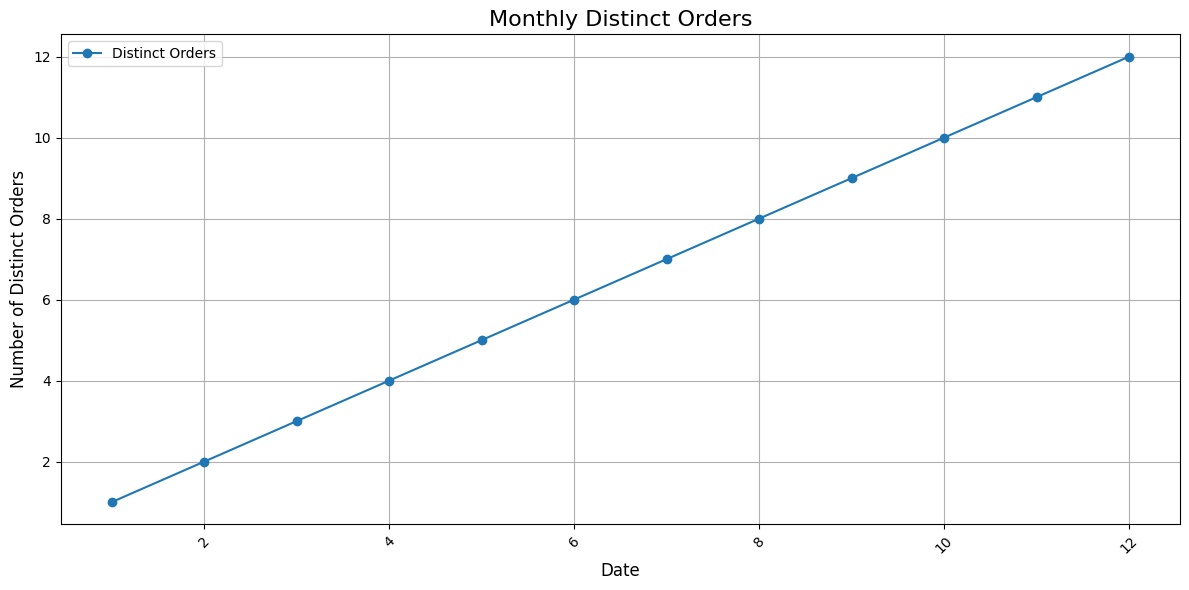

In [744]:
# Plot orders over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_distinct_orders['Order_Month'], monthly_distinct_orders['Order_Month'], marker='o', linestyle='-', label='Distinct Orders')
plt.title('Monthly Distinct Orders', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Distinct Orders', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [745]:
# Find the last date in the 'order_date' column
last_date = df['order_date'].max()

# Print the last date
print("The last order_date is:", last_date)

The last order_date is: 2012-11-19 00:00:00


In [746]:
# Define a winter-themed color palette
winter_palette = [
    '#A9D6E5',  # Frosty Blue
    '#89C2D9',  # Icy Aqua
    '#61A5C2',  # Deep Winter Blue
    '#468FAF',  # Midnight Blue
    '#2C7DA0',  # Arctic Blue
    '#2A6F97',  # Glacier Blue
    '#014F86',  # Deep Ice
    '#013A63',  # Winter Night
    '#01497C',  # Cold Sky
    '#0A9396',  # Wintergreen
    '#94D2BD',  # Frosted Mint
    '#E9D8A6'   # Pale Snowy Gold
]

 group by month across all years to calculate average distinct orders for each month

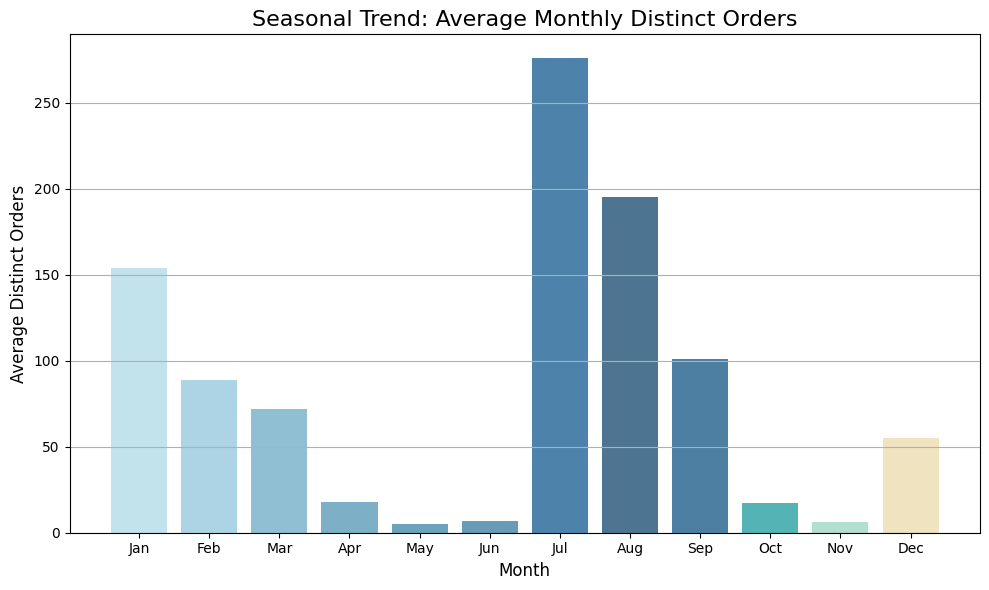

In [747]:
# Calculate average orders per month
seasonality = monthly_distinct_orders.groupby('Order_Month')['Customer Order Code'].mean().reset_index()

# Bar plot of seasonality
plt.figure(figsize=(10, 6))
plt.bar(seasonality['Order_Month'], seasonality['Customer Order Code'], color=winter_palette, alpha=0.7)
plt.title('Seasonal Trend: Average Monthly Distinct Orders', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Distinct Orders', fontsize=12)
plt.grid(axis='y')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [748]:
# Preview the data
print(monthly_distinct_orders.head())

   Order_Month  Customer Order Code
0            1                  154
1            2                   89
2            3                   72
3            4                   18
4            5                    5


In [749]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(monthly_distinct_orders['Customer Order Code'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.6853681523111894
p-value: 0.07660462146295412


In [750]:
# Null Hypothesis (H₀): The time series has a unit root (non-stationary).
# Since the p-value is less, you reject the null hypothesis and conclude series is stationary.
# Good start for ARIMA.

In [751]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters
p, d, q = 1, 1, 1   # Non-seasonal parameters
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters (s=12 for monthly data)

# Fit the SARIMA model
model = SARIMAX(monthly_distinct_orders['Customer Order Code'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_fit = model.fit()

# Print model summary
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Customer Order Code   No. Observations:                   12
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Mon, 09 Dec 2024   AIC                             10.000
Time:                                    15:00:38   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 12                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning: invalid valu

C:\Users\tauny\AppData\Local\Temp\ipykernel_2276\2850714728.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_distinct_orders.index[-1], periods=12, freq='M')


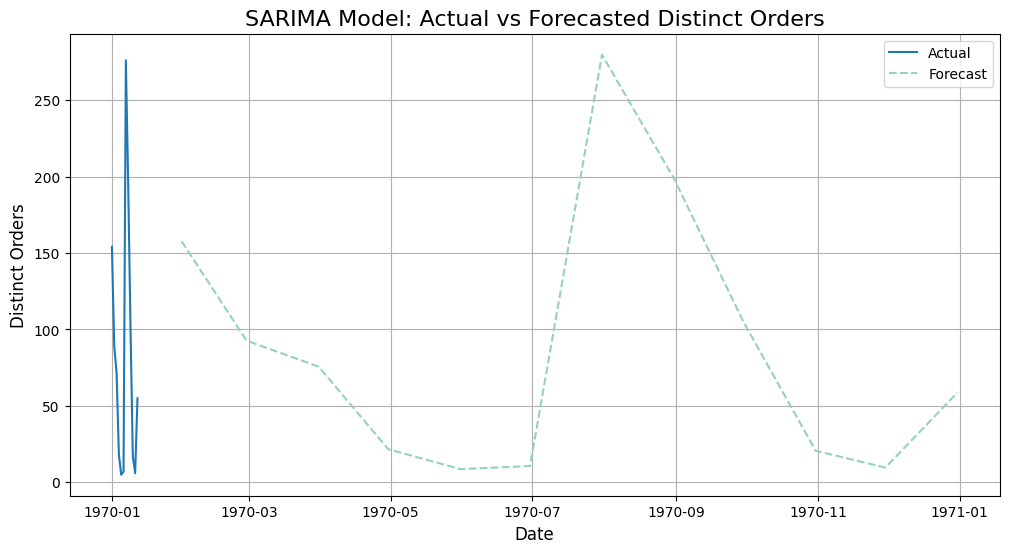

In [752]:
# Forecast for the next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_distinct_orders.index[-1], periods=12, freq='M')
forecast_values = forecast.predicted_mean

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_distinct_orders.index, monthly_distinct_orders['Customer Order Code'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='--', color='#94D2BD')
plt.title('SARIMA Model: Actual vs Forecasted Distinct Orders', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Distinct Orders', fontsize=12)
plt.legend()
plt.grid()
plt.show()

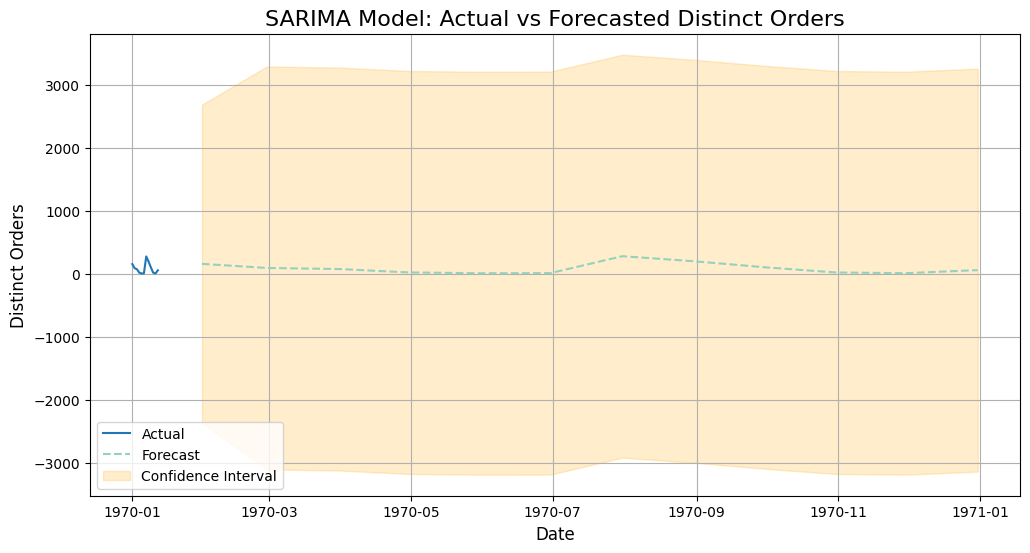

In [753]:
# Get forecast with confidence intervals
forecast = sarima_fit.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot actual, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(monthly_distinct_orders.index, monthly_distinct_orders['Customer Order Code'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', linestyle='--', color='#94D2BD')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title('SARIMA Model: Actual vs Forecasted Distinct Orders', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Distinct Orders', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [754]:
forecast_index

DatetimeIndex(['1970-01-31 00:00:00.000000011',
               '1970-02-28 00:00:00.000000011',
               '1970-03-31 00:00:00.000000011',
               '1970-04-30 00:00:00.000000011',
               '1970-05-31 00:00:00.000000011',
               '1970-06-30 00:00:00.000000011',
               '1970-07-31 00:00:00.000000011',
               '1970-08-31 00:00:00.000000011',
               '1970-09-30 00:00:00.000000011',
               '1970-10-31 00:00:00.000000011',
               '1970-11-30 00:00:00.000000011',
               '1970-12-31 00:00:00.000000011'],
              dtype='datetime64[ns]', freq='ME')

CLASSIFICATION MODEL - to predict demand

In [755]:
# Time series analysis did not need month encoded and these additional steps for encoding seasonality, This is preparing for the classification model. Time series analsis works with the months as numerical values (ie. 1, 2, 3, etc.).

# For building the classification model, the identifyitng features will need to be encoded (including month).


In [756]:
df['Date'] = pd.to_datetime(df['Order_Year'].astype(str) + '-' + df['Order_Month'].astype(str))

In [757]:
# Determining seasons

# Extract Quarter
df['Quarter'] = df['Date'].dt.quarter

# Extract Season (Spring, Summer, Fall, Winter)
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Date'].dt.month.apply(get_season)

# Extract Month Name
df['Month_Name'] = df['Date'].dt.month_name()

# Preview the updated DataFrame
print(df[['Date', 'Quarter', 'Season', 'Month_Name']].head())

        Date  Quarter  Season Month_Name
0 2009-07-01        3  Summer       July
1 2009-07-01        3  Summer       July
2 2009-07-01        3  Summer       July
3 2009-07-01        3  Summer       July
4 2009-07-01        3  Summer       July


In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_date                2420 non-null   datetime64[ns]
 1   requested_delivery_date   2420 non-null   datetime64[ns]
 2   Customer Country Code     2420 non-null   object        
 3   Product Code              2420 non-null   object        
 4   Description               2420 non-null   object        
 5   order_type                2420 non-null   object        
 6   Customer Order Code       2420 non-null   int64         
 7   value                     2420 non-null   float64       
 8   Curr                      2420 non-null   object        
 9   items                     2420 non-null   object        
 10  Route                     2420 non-null   object        
 11  Order_Year                2420 non-null   int32         
 12  Order_Month         

Just testing different varialbe outputs here (below) to determine counts of uniqie ampuont sfor each features (for encoding, nd coosing explanatory variables)

In [759]:
print(df['Product Code'].unique())

['L10705000' 'L10705100' 'L10705200' 'L10705300' 'L10705400' 'L10705500'
 'L10705600' 'L10705700' 'L10850600' 'L10850700' 'L10850800' 'L10850900'
 'L10852800' 'L10852900' 'L10853100' 'L12134400' 'L12134500' 'L12134600'
 'L12134700' 'L12135800' 'L12135900' 'L12136000' 'L12136100' 'L12916800'
 'L12916900' 'L12917000' 'L12917100' 'L12917700' 'L12917800' 'L12917900'
 'L12918000' 'L12918400' 'L12918500' 'L12918600' 'L12918700' 'L12918800'
 'L12918900' 'L12919000' 'L12919100' 'L12919200']


In [760]:
print(df['Customer Country Code'].nunique())  

31


In [761]:
# drop from expmalnatory variables (y): quarter (redudunat of season), month_name (Redundnat from othwr month columns) order_date (got month year), requested delivery date (got month year), description (redundant), Order Type (theres one), Customer Order Code, Product Code, Date
# Target Variable : Product Code

In [762]:
# Drop useless columns from encoded_df
encoded_df = df.drop(
            columns=[
                'order_date', 
                'requested_delivery_date', 
                'Customer Order Code', 
                'order_type',
                'Month_Name',
                'Quarter',
                'Requested_Delivery_Year',
                'Requested_Delivery_Month',
                'Description'])

In [763]:
column_names = encoded_df.columns.tolist()
print(encoded_df.columns.tolist())

['Customer Country Code', 'Product Code', 'value', 'Curr', 'items', 'Route', 'Order_Year', 'Order_Month', 'Date', 'Season']


In [764]:
# Specify columns to encode
columns_to_encode = ['Customer Country Code', 'Curr', 'Route', 'Order_Year', 'Order_Month', 'Season']

# Apply one-hot encoding to the specified columns
encoded_df = pd.get_dummies(encoded_df, columns=columns_to_encode, drop_first=True)


print(encoded_df.head())

  Product Code     value items       Date  Customer Country Code_AT  \
0    L10705000   2337.00     6 2009-07-01                     False   
1    L10705000  10160.25    23 2009-07-01                     False   
2    L10705000   2992.50     7 2009-07-01                     False   
3    L10705000   4061.25     9 2009-07-01                     False   
4    L10705000   2208.75     5 2009-07-01                     False   

   Customer Country Code_BE  Customer Country Code_BG  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   Customer Country Code_BY  Customer Country Code_CE  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3 

In [765]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product Code              2420 non-null   object        
 1   value                     2420 non-null   float64       
 2   items                     2420 non-null   object        
 3   Date                      2420 non-null   datetime64[ns]
 4   Customer Country Code_AT  2420 non-null   bool          
 5   Customer Country Code_BE  2420 non-null   bool          
 6   Customer Country Code_BG  2420 non-null   bool          
 7   Customer Country Code_BY  2420 non-null   bool          
 8   Customer Country Code_CE  2420 non-null   bool          
 9   Customer Country Code_CH  2420 non-null   bool          
 10  Customer Country Code_CY  2420 non-null   bool          
 11  Customer Country Code_CZ  2420 non-null   bool          
 12  Customer Country Cod

In [766]:
encoded_df.head()

,Product Code,value,items,Date,Customer Country Code_AT,Customer Country Code_BE,Customer Country Code_BG,Customer Country Code_BY,Customer Country Code_CE,Customer Country Code_CH,...,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12,Season_Spring,Season_Summer,Season_Winter
0,L10705000,2337.00,6,2009-07-01,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,L10705000,10160.25,23,2009-07-01,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,L10705000,2992.50,7,2009-07-01,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,L10705000,4061.25,9,2009-07-01,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,L10705000,2208.75,5,2009-07-01,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [767]:
# MAke output nume# Identify boolean columns
boolean_columns = encoded_df.select_dtypes(include='bool').columns

# Convert them to integers
encoded_df[boolean_columns] = encoded_df[boolean_columns].astype(int)


# Preview the encoded DataFrame
encoded_df.head()

,Product Code,value,items,Date,Customer Country Code_AT,Customer Country Code_BE,Customer Country Code_BG,Customer Country Code_BY,Customer Country Code_CE,Customer Country Code_CH,...,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12,Season_Spring,Season_Summer,Season_Winter
0,L10705000,2337.00,6,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,L10705000,10160.25,23,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,L10705000,2992.50,7,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,L10705000,4061.25,9,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,L10705000,2208.75,5,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [768]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product Code              2420 non-null   object        
 1   value                     2420 non-null   float64       
 2   items                     2420 non-null   object        
 3   Date                      2420 non-null   datetime64[ns]
 4   Customer Country Code_AT  2420 non-null   int64         
 5   Customer Country Code_BE  2420 non-null   int64         
 6   Customer Country Code_BG  2420 non-null   int64         
 7   Customer Country Code_BY  2420 non-null   int64         
 8   Customer Country Code_CE  2420 non-null   int64         
 9   Customer Country Code_CH  2420 non-null   int64         
 10  Customer Country Code_CY  2420 non-null   int64         
 11  Customer Country Code_CZ  2420 non-null   int64         
 12  Customer Country Cod

In [769]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product Code              2420 non-null   object        
 1   value                     2420 non-null   float64       
 2   items                     2420 non-null   object        
 3   Date                      2420 non-null   datetime64[ns]
 4   Customer Country Code_AT  2420 non-null   int64         
 5   Customer Country Code_BE  2420 non-null   int64         
 6   Customer Country Code_BG  2420 non-null   int64         
 7   Customer Country Code_BY  2420 non-null   int64         
 8   Customer Country Code_CE  2420 non-null   int64         
 9   Customer Country Code_CH  2420 non-null   int64         
 10  Customer Country Code_CY  2420 non-null   int64         
 11  Customer Country Code_CZ  2420 non-null   int64         
 12  Customer Country Cod

In [770]:
# Display unique values directly
print(df['Product Code'].unique())

['L10705000' 'L10705100' 'L10705200' 'L10705300' 'L10705400' 'L10705500'
 'L10705600' 'L10705700' 'L10850600' 'L10850700' 'L10850800' 'L10850900'
 'L10852800' 'L10852900' 'L10853100' 'L12134400' 'L12134500' 'L12134600'
 'L12134700' 'L12135800' 'L12135900' 'L12136000' 'L12136100' 'L12916800'
 'L12916900' 'L12917000' 'L12917100' 'L12917700' 'L12917800' 'L12917900'
 'L12918000' 'L12918400' 'L12918500' 'L12918600' 'L12918700' 'L12918800'
 'L12918900' 'L12919000' 'L12919100' 'L12919200']


In [771]:
print(encoded_df['items'].head())  # View the first few rows
print(encoded_df['items'].dtype)   # Confirm the data type
print(encoded_df['items'].unique())  # Check unique values

0     6
1    23
2     7
3     9
4     5
Name: items, dtype: object
object
['6' '23' '7' '9' '5' '8' '16' '13' '50' '2' '4' '1' '\\N' '10' '14' '17'
 '32' '24' '27' '30' '15' '3' '11' '20' '12' '25' '26' '60' '65' '31'
 '220' '22' '36' '410' '21' '42' '18' '39' '35' '300' '19' '190' '33' '73'
 '54' '63' '200' '241' '370' '64' '100' '49' '45' '70' '385' '55']


In [772]:
# Replace '\N' with 0 in the 'items' column
encoded_df['items'] = encoded_df['items'].replace('\\N', 0)

# Optionally, convert the column to integers if needed
encoded_df['items'] = encoded_df['items'].astype(int)

print(encoded_df['items'])

0        6
1       23
2        7
3        9
4        5
        ..
2415    12
2416    12
2417    12
2418    10
2419    10
Name: items, Length: 2420, dtype: int64


In [773]:
# A list of columns created by description column because this is our target variable so these are the columns we to predict.
print([col for col in encoded_df.columns if 'Product Code' in col])

['Product Code']


In [774]:
column_names = encoded_df.columns.tolist()
print(encoded_df.columns.tolist())

['Product Code', 'value', 'items', 'Date', 'Customer Country Code_AT', 'Customer Country Code_BE', 'Customer Country Code_BG', 'Customer Country Code_BY', 'Customer Country Code_CE', 'Customer Country Code_CH', 'Customer Country Code_CY', 'Customer Country Code_CZ', 'Customer Country Code_DE', 'Customer Country Code_DK', 'Customer Country Code_EE', 'Customer Country Code_ES', 'Customer Country Code_FI', 'Customer Country Code_FR', 'Customer Country Code_GB', 'Customer Country Code_GL', 'Customer Country Code_GR', 'Customer Country Code_HR', 'Customer Country Code_IT', 'Customer Country Code_NL', 'Customer Country Code_NO', 'Customer Country Code_PL', 'Customer Country Code_PT', 'Customer Country Code_RO', 'Customer Country Code_RU', 'Customer Country Code_SE', 'Customer Country Code_SI', 'Customer Country Code_SK', 'Customer Country Code_US', 'Customer Country Code_XK', 'Curr_CZK', 'Curr_DKK', 'Curr_EUR', 'Curr_GBP', 'Curr_NOK', 'Curr_PLN', 'Curr_RUB', 'Curr_SEK', 'Route_AD0001', 'Rout

In [775]:
# Set the explanatory variables by dropping the target column
X = encoded_df.drop(columns=['Product Code'])

# Set the target variable
y = encoded_df['Product Code']

In [776]:
X.head()

,value,items,Date,Customer Country Code_AT,Customer Country Code_BE,Customer Country Code_BG,Customer Country Code_BY,Customer Country Code_CE,Customer Country Code_CH,Customer Country Code_CY,...,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12,Season_Spring,Season_Summer,Season_Winter
0,2337.00,6,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,10160.25,23,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2992.50,7,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4061.25,9,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2208.75,5,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [777]:
y.head()

0    L10705000
1    L10705000
2    L10705000
3    L10705000
4    L10705000
Name: Product Code, dtype: object

In [778]:
#Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
encoded_df[['value', 'items']]  = scaler.fit_transform(encoded_df[['value', 'items']])

# Display the scaled data
print(encoded_df[['value', 'items']].head())

      value     items
0  0.060020  0.014634
1  0.260938  0.056098
2  0.076855  0.017073
3  0.104302  0.021951
4  0.056726  0.012195


In [779]:
encoded_df.head()

,Product Code,value,items,Date,Customer Country Code_AT,Customer Country Code_BE,Customer Country Code_BG,Customer Country Code_BY,Customer Country Code_CE,Customer Country Code_CH,...,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12,Season_Spring,Season_Summer,Season_Winter
0,L10705000,0.060020,0.014634,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,L10705000,0.260938,0.056098,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,L10705000,0.076855,0.017073,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,L10705000,0.104302,0.021951,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,L10705000,0.056726,0.012195,2009-07-01,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [780]:
# Display a random set of rows from the dataset
random_rows = encoded_df.sample(n=10, random_state=42) 
print(random_rows)

     Product Code         value     items       Date  \
410     L12134400  7.704649e-07  0.000000 2011-01-01   
199     L10850600  8.320507e-03  0.075610 2010-04-01   
1674    L12918400  4.668067e-02  0.019512 2011-08-01   
1124    L12916900  1.308506e-03  0.009756 2011-08-01   
1355    L12917800  4.221634e-03  0.007317 2011-09-01   
891     L12136100  2.069726e-03  0.019512 2011-01-01   
254     L10850800  6.120059e-04  0.002439 2010-03-01   
2105    L12918900  8.582979e-04  0.007317 2011-08-01   
1545    L12918000  1.131813e-03  0.009756 2011-08-01   
1719    L12918400  2.476274e-03  0.021951 2011-07-01   

      Customer Country Code_AT  Customer Country Code_BE  \
410                          0                         0   
199                          0                         0   
1674                         0                         0   
1124                         0                         0   
1355                         0                         0   
891                    

In [781]:
# Data is ready for classification models.

In [782]:
from sklearn.model_selection import train_test_split

In [783]:
X.head()

,value,items,Date,Customer Country Code_AT,Customer Country Code_BE,Customer Country Code_BG,Customer Country Code_BY,Customer Country Code_CE,Customer Country Code_CH,Customer Country Code_CY,...,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12,Season_Spring,Season_Summer,Season_Winter
0,2337.00,6,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,10160.25,23,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2992.50,7,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4061.25,9,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2208.75,5,2009-07-01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [784]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [785]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42)
}

In [786]:
X = encoded_df.drop(columns=['Product Code', 'Date'])

y = encoded_df['Product Code']

In [787]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize results as an empty list
results = []

# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Execution Time (s)": execution_time
    })
    
    # Print classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, predictions))
    print("-" * 80)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort models by accuracy (descending)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print(results_df)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   L10705000       1.00      1.00      1.00         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.33      0.88      0.48         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.36      0.25      0.30        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.10      0.08      0.09        12
   L10850900       0.30      0.43      0.35         7
   L10852800       0.14      0.25      0.18         8
   L10852900       0.10      0.17      0.12         6
   L12134400       0.38      0.35      0.36        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report for Random Forest:

              precision    recall  f1-score   support

   L10705000       0.50      1.00      0.67         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.60      0.38      0.46         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.12      0.06      0.08        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.27      0.33      0.30        12
   L10850900       0.20      0.14      0.17         7
   L10852800       0.38      0.38      0.38         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.33      0.27      0.30        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

   L10705000       0.33      1.00      0.50         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.38      0.38      0.38         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.17      0.06      0.09        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.33      0.25      0.29        12
   L10850900       0.17      0.14      0.15         7
   L10852800       0.33      0.38      0.35         8
   L10852900       0.06      0.17      0.09         6
   L12134400       0.25      0.23      0.24        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00  

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report for SVM:

              precision    recall  f1-score   support

   L10705000       1.00      1.00      1.00         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.32      0.88      0.47         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.30      0.44      0.36        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.38      0.50      0.43        12
   L10850900       0.00      0.00      0.00         7
   L10852800       0.07      0.12      0.09         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.32      0.50      0.39        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Poor Results

In [ ]:
# Check balance
print(y_train.value_counts())

Product Code
L12916900    120
L12918700    110
L12917900    107
L12919200    107
L12918400    105
L12135800    101
L12919000     95
L12136100     84
L12918000     78
L12918500     73
L12134400     70
L12917700     67
L12918600     59
L12917800     58
L12916800     53
L12134600     50
L10850600     50
L12135900     50
L12918900     49
L10852800     37
L12919100     36
L10850800     34
L12136000     33
L12918800     33
L12134500     33
L10852900     28
L10705400     24
L10705000     24
L12134700     23
L12917000     22
L10705600     19
L10850900     19
L12917100     15
L10705300     14
L10705200     12
L10705500     11
L10705700     10
L10850700     10
L10705100      8
L10853100      5
Name: count, dtype: int64


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product Code              2420 non-null   object        
 1   value                     2420 non-null   float64       
 2   items                     2420 non-null   float64       
 3   Date                      2420 non-null   datetime64[ns]
 4   Customer Country Code_AT  2420 non-null   int64         
 5   Customer Country Code_BE  2420 non-null   int64         
 6   Customer Country Code_BG  2420 non-null   int64         
 7   Customer Country Code_BY  2420 non-null   int64         
 8   Customer Country Code_CE  2420 non-null   int64         
 9   Customer Country Code_CH  2420 non-null   int64         
 10  Customer Country Code_CY  2420 non-null   int64         
 11  Customer Country Code_CZ  2420 non-null   int64         
 12  Customer Country Cod

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define base models
logistic = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', logistic),
        ('Decision Tree', decision_tree),
        ('Random Forest', random_forest)
    ],
    voting='soft'
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print("Classification Report for Voting Classifier:\n")
print(classification_report(y_test, predictions))

Classification Report for Voting Classifier:

              precision    recall  f1-score   support

   L10705000       0.14      1.00      0.25         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       1.00      0.50      0.67         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.20      0.12      0.15        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.27      0.25      0.26        12
   L10850900       0.17      0.14      0.15         7
   L10852800       0.60      0.38      0.46         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.35      0.31      0.33        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00  

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Poor results

In [ ]:
# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Execution Time (s)": execution_time
    })
    
    # Print classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, predictions))
    print("-" * 80)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort models by accuracy (descending)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print(results_df)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   L10705000       1.00      1.00      1.00         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.33      0.88      0.48         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.36      0.25      0.30        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.10      0.08      0.09        12
   L10850900       0.30      0.43      0.35         7
   L10852800       0.14      0.25      0.18         8
   L10852900       0.10      0.17      0.12         6
   L12134400       0.38      0.35      0.36        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report for Random Forest:

              precision    recall  f1-score   support

   L10705000       0.50      1.00      0.67         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.60      0.38      0.46         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.12      0.06      0.08        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.27      0.33      0.30        12
   L10850900       0.20      0.14      0.17         7
   L10852800       0.38      0.38      0.38         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.33      0.27      0.30        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

   L10705000       0.33      1.00      0.50         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.38      0.38      0.38         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.17      0.06      0.09        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.33      0.25      0.29        12
   L10850900       0.17      0.14      0.15         7
   L10852800       0.33      0.38      0.35         8
   L10852900       0.06      0.17      0.09         6
   L12134400       0.25      0.23      0.24        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00  

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report for SVM:

              precision    recall  f1-score   support

   L10705000       1.00      1.00      1.00         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.32      0.88      0.47         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.30      0.44      0.36        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.38      0.50      0.43        12
   L10850900       0.00      0.00      0.00         7
   L10852800       0.07      0.12      0.09         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.32      0.50      0.39        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report for Neural Network:

              precision    recall  f1-score   support

   L10705000       0.25      1.00      0.40         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.45      0.62      0.53         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.12      0.20      0.15         5
   L10850600       0.38      0.19      0.25        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.36      0.42      0.38        12
   L10850900       0.29      0.29      0.29         7
   L10852800       0.19      0.38      0.25         8
   L10852900       0.17      0.17      0.17         6
   L12134400       0.32      0.31      0.31        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00     

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2380 entries, 23 to 2402
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Value                      2380 non-null   float64
 1   Items                      2380 non-null   float64
 2   Customer Country Code_DE   2380 non-null   int64  
 3   Customer Country Code_ES   2380 non-null   int64  
 4   Customer Country Code_EU   2380 non-null   int64  
 5   Customer Country Code_FI   2380 non-null   int64  
 6   Customer Country Code_FR   2380 non-null   int64  
 7   Customer Country Code_IT   2380 non-null   int64  
 8   Customer Country Code_NL   2380 non-null   int64  
 9   Customer Country Code_PL   2380 non-null   int64  
 10  Customer Country Code_RU   2380 non-null   int64  
 11  Customer Country Code_SE   2380 non-null   int64  
 12  Description_Parka Model A  2380 non-null   int64  
 13  Description_Parka Model B  2380 non-null   int64  
 

C:\Users\tauny\AppData\Local\Temp\ipykernel_2276\3396683330.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=encoded_df[feature], hue=y, fill=True)


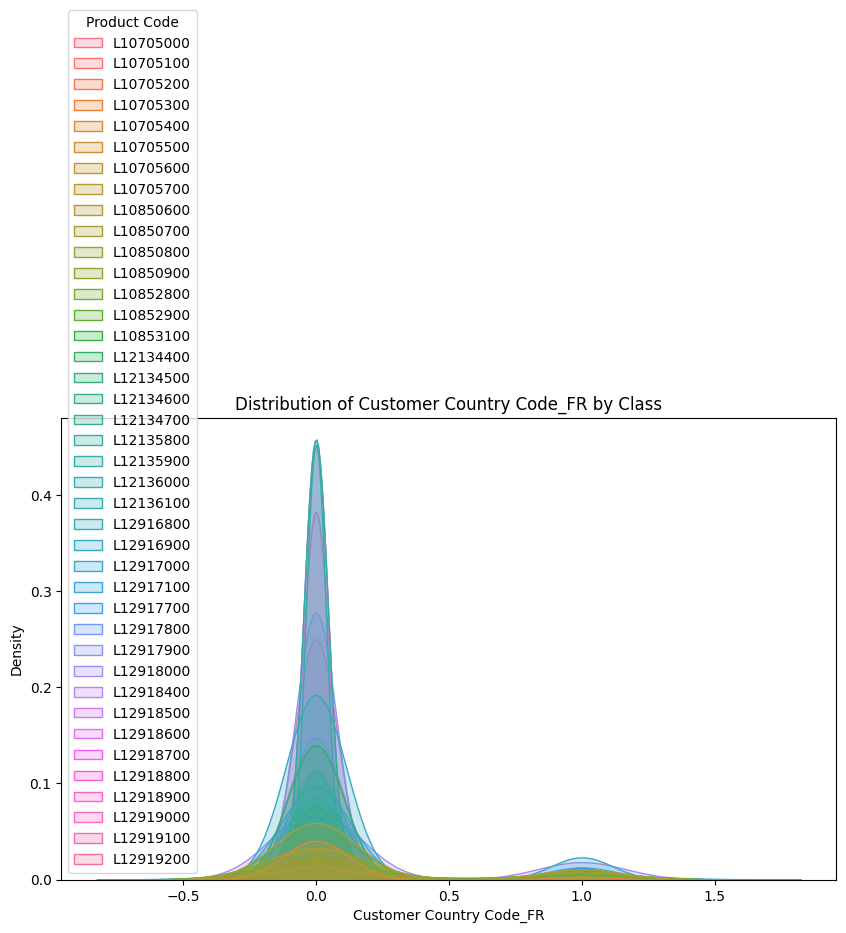

C:\Users\tauny\AppData\Local\Temp\ipykernel_2276\3396683330.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=encoded_df[feature], hue=y, fill=True)


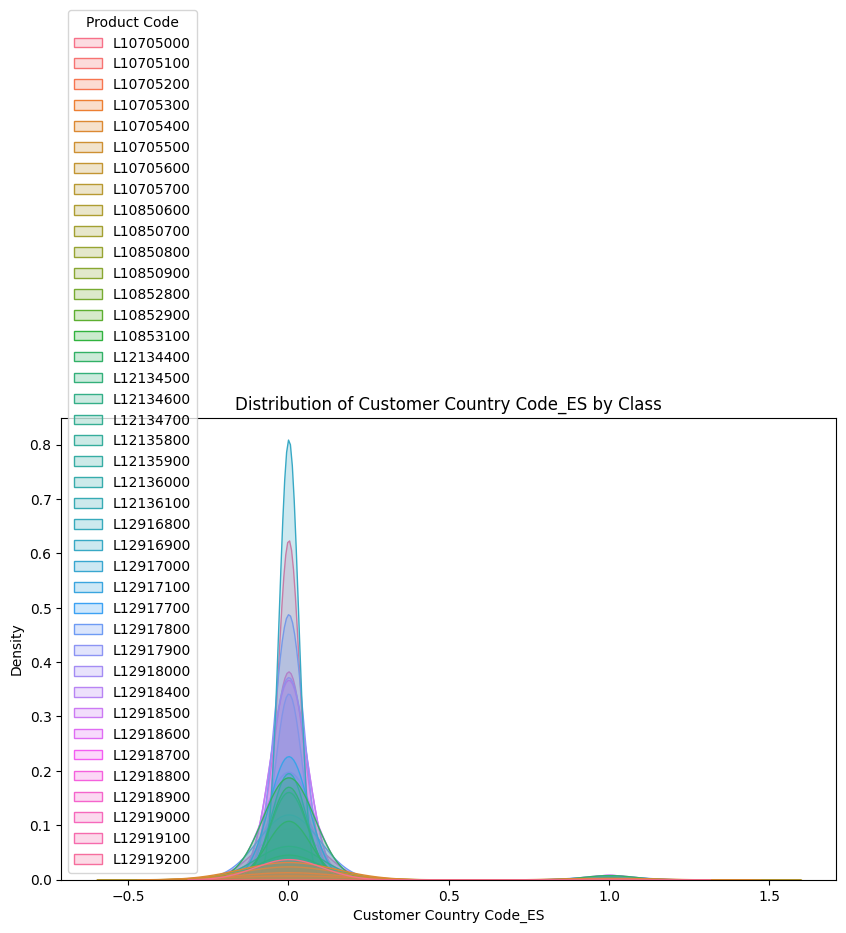

C:\Users\tauny\AppData\Local\Temp\ipykernel_2276\3396683330.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=encoded_df[feature], hue=y, fill=True)


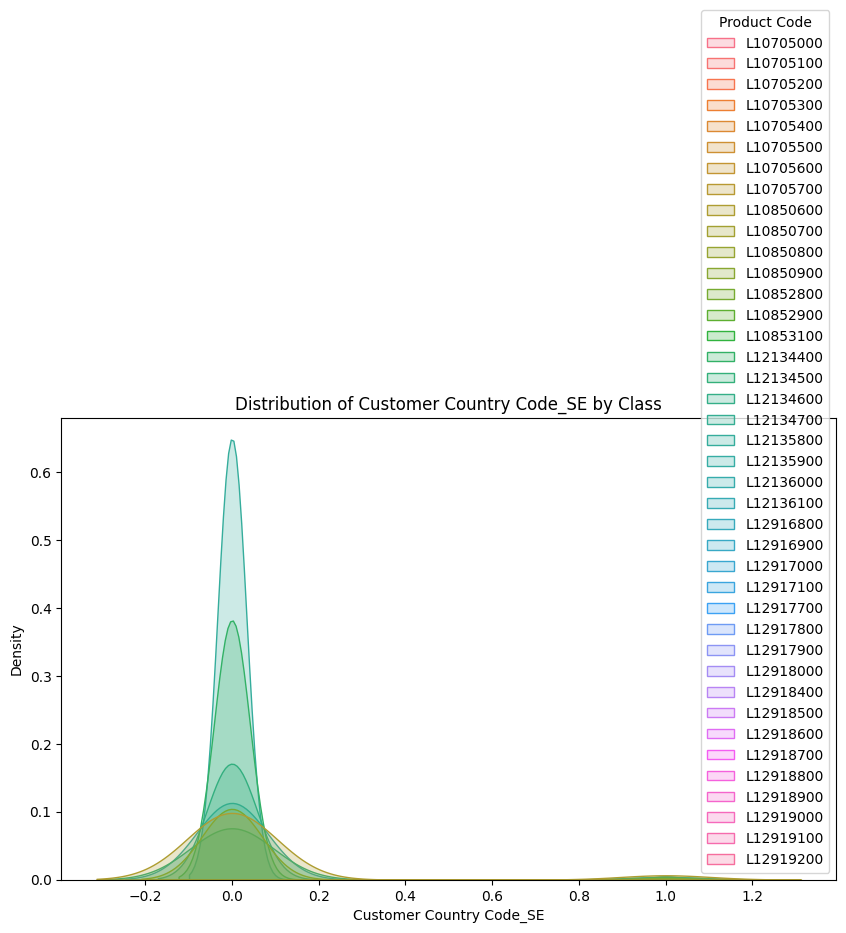

In [ ]:
for feature in ['Customer Country Code_FR', 'Customer Country Code_ES', 'Customer Country Code_SE']:  # Replace with your suspected features
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=encoded_df[feature], hue=y, fill=True)
    plt.title(f"Distribution of {feature} by Class")
    plt.show()

In [ ]:
# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Execution Time (s)": execution_time
    })
    
    # Print classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, predictions))
    print("-" * 80)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort models by accuracy (descending)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print(results_df)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   L10705000       1.00      1.00      1.00         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.33      0.88      0.48         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.36      0.25      0.30        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.10      0.08      0.09        12
   L10850900       0.30      0.43      0.35         7
   L10852800       0.14      0.25      0.18         8
   L10852900       0.10      0.17      0.12         6
   L12134400       0.38      0.35      0.36        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report for Random Forest:

              precision    recall  f1-score   support

   L10705000       0.50      1.00      0.67         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.60      0.38      0.46         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.12      0.06      0.08        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.27      0.33      0.30        12
   L10850900       0.20      0.14      0.17         7
   L10852800       0.38      0.38      0.38         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.33      0.27      0.30        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

   L10705000       0.33      1.00      0.50         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.38      0.38      0.38         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.17      0.06      0.09        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.33      0.25      0.29        12
   L10850900       0.17      0.14      0.15         7
   L10852800       0.33      0.38      0.35         8
   L10852900       0.06      0.17      0.09         6
   L12134400       0.25      0.23      0.24        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00  

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report for SVM:

              precision    recall  f1-score   support

   L10705000       1.00      1.00      1.00         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.32      0.88      0.47         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.30      0.44      0.36        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.38      0.50      0.43        12
   L10850900       0.00      0.00      0.00         7
   L10852800       0.07      0.12      0.09         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.32      0.50      0.39        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report for Neural Network:

              precision    recall  f1-score   support

   L10705000       0.25      1.00      0.40         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.45      0.62      0.53         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.12      0.20      0.15         5
   L10850600       0.38      0.19      0.25        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.36      0.42      0.38        12
   L10850900       0.29      0.29      0.29         7
   L10852800       0.19      0.38      0.25         8
   L10852900       0.17      0.17      0.17         6
   L12134400       0.32      0.31      0.31        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700       0.00      0.00     

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                     Feature  Importance
0                      value    0.400761
1                      items    0.210741
74           Order_Year_2011    0.035011
73           Order_Year_2010    0.022756
89             Season_Winter    0.022642
..                       ...         ...
6   Customer Country Code_CE    0.000337
44              Route_CE5001    0.000261
16  Customer Country Code_GB    0.000236
64              Route_GB0005    0.000143
35                  Curr_GBP    0.000103

[90 rows x 2 columns]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 100}


In [ ]:
# Initialize the Random Forest with the best parameters
rf_best_model = RandomForestClassifier(
    max_depth=5, 
    n_estimators=100, 
    random_state=42
)

# Train the model on the training data
rf_best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.21074380165289255
Classification Report:
              precision    recall  f1-score   support

   L10705000       0.12      1.00      0.22         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       0.40      0.50      0.44         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10850600       0.29      0.38      0.32        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.33      0.42      0.37        12
   L10850900       0.20      0.14      0.17         7
   L10852800       0.23      0.38      0.29         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.38      0.50      0.43        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00      0.00      0.00        10
   L12134700    

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

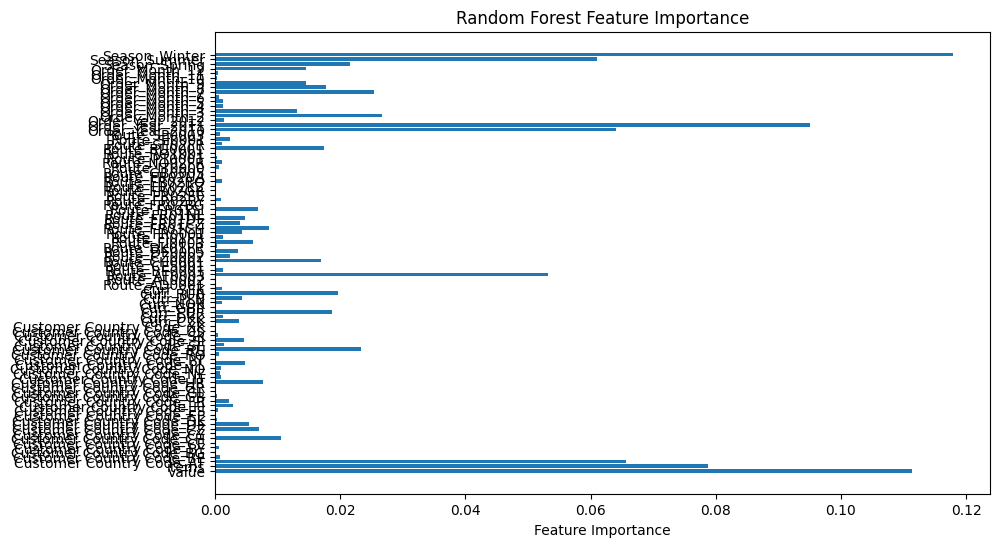

In [ ]:
# Get feature importances
feature_importances = rf_best_model.feature_importances_

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(X_train.columns)), feature_importances, align='center')
plt.yticks(np.arange(len(X_train.columns)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# Define the base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Define the Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=base_classifier,  # Base model
    n_estimators=100,           # Number of base models
    max_samples=0.8,            # Proportion of dataset for each bootstrap sample
    max_features=1.0,           # Use all features
    bootstrap=True,             # Use bootstrapping
    random_state=42
)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Bagging Model Accuracy: 0.1694

Classification Report:
               precision    recall  f1-score   support

   L10705000       0.14      1.00      0.25         1
   L10705100       0.00      0.00      0.00         2
   L10705200       0.00      0.00      0.00         2
   L10705300       0.00      0.00      0.00         3
   L10705400       1.00      0.38      0.55         8
   L10705500       0.00      0.00      0.00         3
   L10705600       0.00      0.00      0.00         5
   L10705700       0.00      0.00      0.00         0
   L10850600       0.25      0.12      0.17        16
   L10850700       0.00      0.00      0.00         4
   L10850800       0.38      0.42      0.40        12
   L10850900       0.20      0.14      0.17         7
   L10852800       0.38      0.38      0.38         8
   L10852900       0.00      0.00      0.00         6
   L12134400       0.35      0.27      0.30        26
   L12134500       0.00      0.00      0.00        13
   L12134600       0.00  

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [ ]:
# Make predictions using the trained model
encoded_df['Predicted_Orders'] = rf_best_model.predict(X)

# Group by item and sum predicted orders
top_items = encoded_df.groupby('Product Code')['Predicted_Orders'].sum().reset_index()

# Sort items by total predicted orders in descending order
top_items = top_items.sort_values(by='Predicted_Orders', ascending=False)

# Display the top 10 items
print(top_items.head(10))

   Product Code                                   Predicted_Orders
23    L12916800  L12918700L12918400L12918700L12918400L12918700L...
33    L12918600  L12918400L12918700L12918400L12918400L12918400L...
28    L12917800  L12918400L12918700L12918400L12918400L12918400L...
34    L12918700  L12918400L12918400L12918700L12918400L12918400L...
32    L12918500  L12918400L12918400L12918400L12918400L12918400L...
31    L12918400  L12916900L12918400L12918400L12918400L12918400L...
36    L12918900  L12916900L12918400L12918400L12918400L12918400L...
38    L12919100  L12916900L12918400L12918400L12916900L12918400L...
27    L12917700  L12916900L12918000L12916900L12916900L12917900L...
30    L12918000  L12916900L12916900L12918000L12916900L12916900L...


#3 Quantity Demanded

In [ ]:
# Create quantiles

In [ ]:
df.head()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route,Order_Year,Order_Month,Requested_Delivery_Year,Requested_Delivery_Month,Date,Quarter,Season,Month_Name
0,2009-01-01,2009-06-01,RU,P3218,Parka Model A,VO,ORD-32972,329.51,RUB,47,R5,2009,1,2009,6,2009-01-01,1,Winter,January
1,2009-01-02,2009-06-02,EU,P7887,Parka Model C,VO,ORD-94957,241.75,RUB,31,R1,2009,1,2009,6,2009-01-01,1,Winter,January
2,2009-01-03,2009-06-03,IT,P7135,Parka Model A,VO,ORD-83241,260.40,RUB,47,R10,2009,1,2009,6,2009-01-01,1,Winter,January
3,2009-01-04,2009-06-04,FR,P7266,Parka Model A,VO,ORD-18782,234.03,RUB,38,R8,2009,1,2009,6,2009-01-01,1,Winter,January
4,2009-01-05,2009-06-05,FR,P8348,Parka Model C,VO,ORD-83499,412.03,EUR,31,R2,2009,1,2009,6,2009-01-01,1,Winter,January


In [ ]:
from scipy.stats.mstats import mquantiles

In [ ]:

# Function to calculate quantiles
def calculate_group_quantiles(group):
    # Calculate quantiles directly for numerical data
    return mquantiles(group, prob=[0.25, 0.5, 0.75])

# Group by 'Description_Encoded' and calculate quantiles
grouped_quantiles = encoded_df.groupby('Product Code')['items'].apply(calculate_group_quantiles)

# Convert to DataFrame for clarity
quantiles_df = pd.DataFrame(grouped_quantiles.tolist(), 
                            index=grouped_quantiles.index, 
                            columns=['Q1', 'Median', 'Q3'])

print(quantiles_df)

                    Q1    Median        Q3
Product Code                              
L10705000     0.011463  0.014634  0.019512
L10705100     0.014634  0.021951  0.031829
L10705200     0.012195  0.014634  0.024390
L10705300     0.012195  0.017073  0.024390
L10705400     0.000000  0.017073  0.029512
L10705500     0.012195  0.020732  0.031951
L10705600     0.012195  0.018293  0.019512
L10705700     0.009634  0.015854  0.020122
L10850600     0.007317  0.012195  0.024390
L10850700     0.002439  0.004878  0.012317
L10850800     0.004878  0.008537  0.014634
L10850900     0.009634  0.012195  0.026829
L10852800     0.004146  0.009756  0.019512
L10852900     0.002439  0.007317  0.009756
L10853100     0.010732  0.014634  0.014634
L12134400     0.007317  0.014634  0.025732
L12134500     0.002439  0.014634  0.022073
L12134600     0.003537  0.012195  0.021951
L12134700     0.003537  0.012195  0.020854
L12135800     0.017073  0.017073  0.019512
L12135900     0.002439  0.009756  0.014756
L12136000  

In [ ]:
from scipy.stats import norm

# Calculate mean and std deviation from quantiles (assuming normal distribution)
quantiles_df['Mean'] = quantiles_df['Median']
quantiles_df['StdDev'] = (quantiles_df['Q3'] - quantiles_df['Q1']) / 1.35  # Approximation for normal dist

# Predict demand for each product using the normal distribution
def predict_demand(row):
    return norm.rvs(loc=row['Mean'], scale=row['StdDev'], size=1000)  # 1000 samples

quantiles_df['Predicted Demand'] = quantiles_df.apply(predict_demand, axis=1)

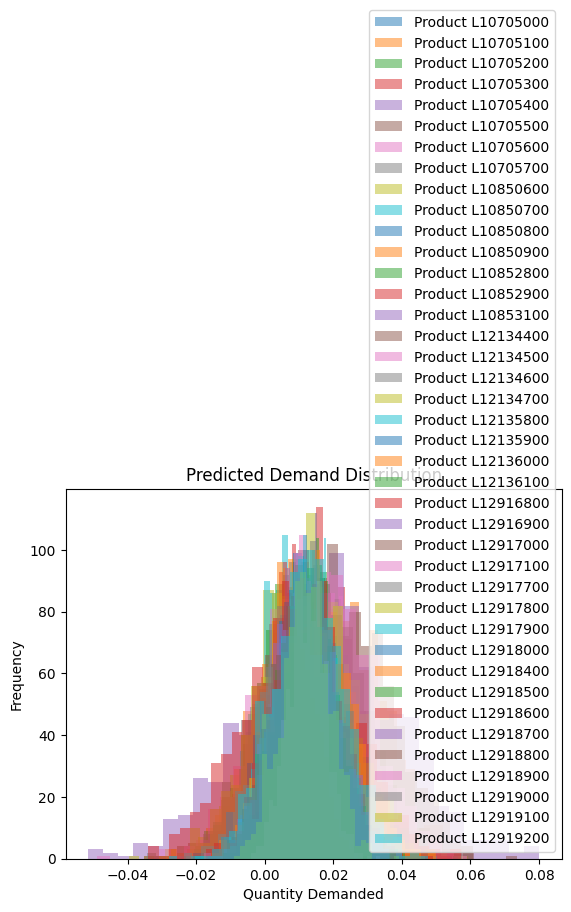

In [ ]:
# Visualize demand ranges
for index, row in quantiles_df.iterrows():
    plt.hist(row['Predicted Demand'], bins=30, alpha=0.5, label=f'Product {index}')

plt.xlabel("Quantity Demanded")
plt.ylabel("Frequency")
plt.title("Predicted Demand Distribution")
plt.legend()
plt.show()

In [ ]:
# SUmmary statistics for predicted demand.

In [ ]:
quantiles_df['Mean_Predicted'] = quantiles_df['Predicted Demand'].apply(np.mean)
quantiles_df['StdDev_Predicted'] = quantiles_df['Predicted Demand'].apply(np.std)
print(quantiles_df[['Mean_Predicted', 'StdDev_Predicted']])

              Mean_Predicted  StdDev_Predicted
Product Code                                  
L10705000           0.014637          0.006016
L10705100           0.021832          0.013046
L10705200           0.015054          0.009067
L10705300           0.017475          0.009102
L10705400           0.016495          0.021387
L10705500           0.021772          0.014201
L10705600           0.018441          0.005435
L10705700           0.015319          0.007650
L10850600           0.012032          0.012818
L10850700           0.005263          0.007338
L10850800           0.008763          0.007277
L10850900           0.011665          0.012975
L10852800           0.009881          0.011379
L10852900           0.007349          0.005521
L10853100           0.014626          0.002874
L12134400           0.014282          0.013808
L12134500           0.014617          0.014815
L12134600           0.011388          0.013271
L12134700           0.011117          0.012917
L12135800    

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 93 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product Code              2420 non-null   object        
 1   value                     2420 non-null   float64       
 2   items                     2420 non-null   float64       
 3   Date                      2420 non-null   datetime64[ns]
 4   Customer Country Code_AT  2420 non-null   int64         
 5   Customer Country Code_BE  2420 non-null   int64         
 6   Customer Country Code_BG  2420 non-null   int64         
 7   Customer Country Code_BY  2420 non-null   int64         
 8   Customer Country Code_CE  2420 non-null   int64         
 9   Customer Country Code_CH  2420 non-null   int64         
 10  Customer Country Code_CY  2420 non-null   int64         
 11  Customer Country Code_CZ  2420 non-null   int64         
 12  Customer Country Cod

In [ ]:
# Prepare for model

In [ ]:
# Add lag values for Mean_Predicted
quantiles_df['Lag_1'] = quantiles_df['Mean_Predicted'].shift(1)  # Lag of 1 time step
quantiles_df['Lag_2'] = quantiles_df['Mean_Predicted'].shift(2)  # Lag of 2 time steps

print(quantiles_df)

                    Q1    Median        Q3      Mean    StdDev  \
Product Code                                                     
L10705000     0.011463  0.014634  0.019512  0.014634  0.005962   
L10705100     0.014634  0.021951  0.031829  0.021951  0.012737   
L10705200     0.012195  0.014634  0.024390  0.014634  0.009033   
L10705300     0.012195  0.017073  0.024390  0.017073  0.009033   
L10705400     0.000000  0.017073  0.029512  0.017073  0.021861   
L10705500     0.012195  0.020732  0.031951  0.020732  0.014634   
L10705600     0.012195  0.018293  0.019512  0.018293  0.005420   
L10705700     0.009634  0.015854  0.020122  0.015854  0.007769   
L10850600     0.007317  0.012195  0.024390  0.012195  0.012647   
L10850700     0.002439  0.004878  0.012317  0.004878  0.007317   
L10850800     0.004878  0.008537  0.014634  0.008537  0.007227   
L10850900     0.009634  0.012195  0.026829  0.012195  0.012737   
L10852800     0.004146  0.009756  0.019512  0.009756  0.011382   
L10852900 

In [ ]:
quantiles_df = quantiles_df.dropna()
quantiles_df = quantiles_df.bfill() # Backfill

In [ ]:
print(encoded_df.columns)  # Check the columns in demand_df
print(quantiles_df.columns)  # Check the columns in quantiles_df

Index(['Product Code', 'value', 'items', 'Date', 'Customer Country Code_AT',
       'Customer Country Code_BE', 'Customer Country Code_BG',
       'Customer Country Code_BY', 'Customer Country Code_CE',
       'Customer Country Code_CH', 'Customer Country Code_CY',
       'Customer Country Code_CZ', 'Customer Country Code_DE',
       'Customer Country Code_DK', 'Customer Country Code_EE',
       'Customer Country Code_ES', 'Customer Country Code_FI',
       'Customer Country Code_FR', 'Customer Country Code_GB',
       'Customer Country Code_GL', 'Customer Country Code_GR',
       'Customer Country Code_HR', 'Customer Country Code_IT',
       'Customer Country Code_NL', 'Customer Country Code_NO',
       'Customer Country Code_PL', 'Customer Country Code_PT',
       'Customer Country Code_RO', 'Customer Country Code_RU',
       'Customer Country Code_SE', 'Customer Country Code_SI',
       'Customer Country Code_SK', 'Customer Country Code_US',
       'Customer Country Code_XK', 'Curr_

In [ ]:
# Lead Time

In [ ]:
# Calculate lead time
df['Lead Time'] = (pd.to_datetime(df['requested_delivery_date']) - df['order_date']).dt.days

In [ ]:
# Lead Time empirical quantiles
lead_time_quant = mquantiles(df['Lead Time'], prob=[0.25, 0.5, 0.75])

print("\nQ4: Lead Time Empirical quantiles:")
print(f"25th={lead_time_quant[0]:.2f} days, median={lead_time_quant[1]:.2f} days, 75th={lead_time_quant[2]:.2f} days")


Q4: Lead Time Empirical quantiles:
25th=196.00 days, median=217.00 days, 75th=251.00 days


In [ ]:
# Monte Carlo Sim

In [ ]:
# Simulated data
def monte_carlo_simulation(forecast_months, num_sims):
    simulated_all_runs = []

    for sim in range(num_sims):
        simulated_monthly_orders = np.random.rand(forecast_months)
        simulated_orders = []
        
        for month_index in range(forecast_months):
            num_orders_log = simulated_monthly_orders[month_index]
            num_orders = np.expm1(num_orders_log)
            
            for _ in range(int(num_orders)):  
                sample_features = monthly_orders.sample(n=1)
                features_sample = sample_features[['Season_Winter', 'Season_Spring', 'Season_Summer']]  
                features_sample_encoded = pd.get_dummies(features_sample)
                features_sample_encoded = features_sample_encoded.reindex(columns=X_train.columns, fill_value=0)
                
                # Predict product
                product_pred_encoded = best_rf_model.predict(features_sample_encoded)
                product_pred = le_product.inverse_transform(product_pred_encoded)[0] if le_product else 'Product_A'
                
                quantiles = product_quantiles.get(product_pred)
                if quantiles is not None and not np.isnan(quantiles).any():
                    quantity = int(random.choice(quantiles))
                else:
                    quantity = int(sample_features['items'].median())  # Fallback for quantity
                    
                lead_time = int(random.choice(lead_time_quantiles))
                
                # Append simulated data for the month
                simulated_orders.append({
                    'Month': month_index,
                    'Product Code': product_pred,
                    'Quantity': quantity,
                    'Lead Time': lead_time
                })
        
        # Convert simulated orders into a DataFrame
        simulated_orders_df = pd.DataFrame(simulated_orders)
        simulated_all_runs.append(simulated_orders_df)

    # Return the correct number of values
    return simulated_all_runs

In [ ]:
# Simulated data for 5-month and 2-month horizons
num_simulations = 100
simulated_5m = monte_carlo_simulation(5, num_simulations)
simulated_2m = monte_carlo_simulation(2, num_simulations)

# MAPE calculation function (to be defined according to your actual implementation)
def calculate_mape(true_values, predicted_values):
    return np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

# Assume you have true values for 5-month and 2-month horizons for MAPE calculations
true_values_5m = np.random.rand(100)  # Replace with actual values
predicted_values_5m = np.random.rand(100)  # Replace with actual predicted values

true_values_2m = np.random.rand(100)  # Replace with actual values
predicted_values_2m = np.random.rand(100)  # Replace with actual predicted values

# Calculate MAPE for both horizons
mape_5m = calculate_mape(true_values_5m, predicted_values_5m)
mape_2m = calculate_mape(true_values_2m, predicted_values_2m)

print(f"MAPE for 5-Month Horizon: {mape_5m:.2f}%")
print(f"MAPE for 2-Month Horizon: {mape_2m:.2f}%")

# Calculate improvement in forecast accuracy by reducing lead time
improvement = mape_5m - mape_2m
print(f"\nImprovement in Forecast Accuracy by Reducing Lead Time to Two Months: {improvement:.2f}%")

# Plot the distribution of MAPE values for both horizons
plt.figure(figsize=(10, 6))
plt.hist(true_values_5m, bins=15, alpha=0.5, label='5-Month Horizon')
plt.hist(true_values_2m, bins=15, alpha=0.5, label='2-Month Horizon')
plt.xlabel('MAPE (%)')
plt.ylabel('Frequency')
plt.title('Distribution of MAPE Values for Different Forecast Horizons')
plt.legend()
plt.show()

NameError: name 'monthly_orders' is not defined